# Support Vector Machine : Classify Iris Dataset

In [ ]:
import pandas as pd

In [30]:
# Load back from CSV
df = pd.read_csv("data_iris.csv")
print(df.head())

   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa


In [31]:
# shape of dataset:
print(df.shape)

(150, 5)


In [32]:
# lets see value counts of all 3 species
df["species"].value_counts()

species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

In [ ]:
# 2

In [33]:
# Separate features and target
X = df.drop('species', axis=1).values
y = df['species'].values

In [36]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_encoded = le.fit_transform(y)

print("mappings:", dict(zip(le.classes_, le.transform(le.classes_))))

mappings: {'setosa': 0, 'versicolor': 1, 'virginica': 2}


In [37]:
# Lets print 1st 5 values of y_encoded
print(y_encoded[:5])

[0 0 0 0 0]


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.3, random_state=42)

In [ ]:
# 3

# Feature Scaling (VERY IMPORTANT FOR SVM)
- SVM is distance-based, so scaling is mandatory.

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)

# We never call fit() on test data because that would leak test information into the training process.
X_test_scaled  = scaler.transform(X_test) 

In [ ]:
# 4

In [40]:
from sklearn.svm import SVC

model = SVC()

# Train model
model.fit(X_train_scaled, y_train)

SVC()

In [41]:
# print model hyper parameters
print(model.get_params())

# Important ones: kernel, C, Gamma, Degree, decision_function_shape

# Try different hyperparameters and see which one gives better accuracy.

# kernel='linear' for linear separation
# decision_function_shape='ovr' means One-vs-Rest
#     One-vs-Rest (OvR) → Train one SVM per class (that class vs all others).
#     One-vs-One (OvO) → Train one SVM for every pair of classes and pick the winner by voting.

# model = SVC(kernel='linear', decision_function_shape='ovo') # or use this

{'C': 1.0, 'break_ties': False, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 'scale', 'kernel': 'rbf', 'max_iter': -1, 'probability': False, 'random_state': None, 'shrinking': True, 'tol': 0.001, 'verbose': False}


In [ ]:
# 5

In [42]:
# step1: Lets make prediction on 2 data points that I copied
new_data = [
    [5.1, 3.5, 1.4, 0.2],   # actually setosa
    [6.3, 3.3, 6,   2.5]    # actually virginica
]

new_data_scaled = scaler.transform(new_data)

predictions = model.predict(new_data_scaled)
print("Encoded Predictions:", predictions)

Encoded Predictions: [0 2]


In [43]:
# step2: decode the labels
predicted_species = le.inverse_transform(predictions)
print("Predicted Species:", predicted_species)

Predicted Species: ['setosa' 'virginica']


In [ ]:
# 6

In [44]:
# Predict on test data
y_pred = model.predict(X_test_scaled)

In [45]:
# lets check the prediction on first 5 data points of X_test
print(X_test[:5])
print(y_pred[:5])

[[6.1 2.8 4.7 1.2]
 [5.7 3.8 1.7 0.3]
 [7.7 2.6 6.9 2.3]
 [6.  2.9 4.5 1.5]
 [6.8 2.8 4.8 1.4]]
[1 0 2 1 1]


In [46]:
# Lets compare the predicted vs actual value on test data
print("predict:", y_pred[:30])
print("actual :", y_test[:30])

predict: [1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0]
actual : [1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0]


In [47]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 1.0


In [48]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
print("\nConfusion Matrix:")
print(cm)


Confusion Matrix:
[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]


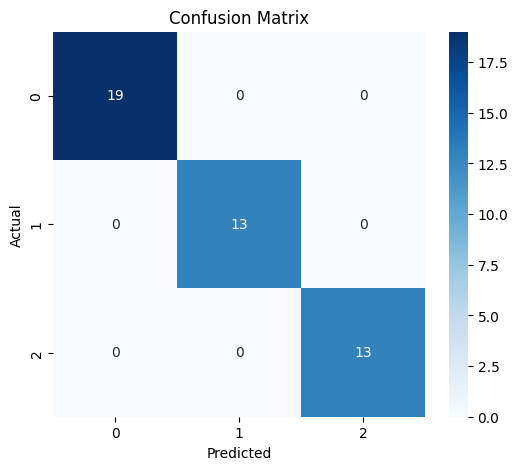

In [49]:
# Plot confusion matrix heatmap
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=model.classes_, yticklabels=model.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# OPTIONAL

In [50]:
# Check Number of Support Vectors (Very Important Concept)
# This tells you how many critical points define the decision boundary.

print("Number of Support Vectors per Class:", model.n_support_)
print("Total Support Vectors:", model.support_vectors_.shape[0])

Number of Support Vectors per Class: [ 7 19 17]
Total Support Vectors: 43


In [53]:
# print Support vectors, if needed

# Which Training Samples Became Support Vectors?
print("Indices of Support Vectors:", model.support_)


# support_vectors = model.support_vectors_
# print("Support Vectors (Scaled):\n", support_vectors)


support_vectors_original = scaler.inverse_transform(model.support_vectors_)
print("Support Vectors (Original Feature Scale):\n", support_vectors_original)

Indices of Support Vectors: [ 17  18  26  51  52  76 102   7  14  21  30  32  39  44  45  47  58  64
  65  67  74  75  77  84  90  95   1   2   9  15  22  27  28  31  48  53
  54  66  86  94  97  98 101]
Support Vectors (Original Feature Scale):
 [[5.  3.  1.6 0.2]
 [5.1 3.3 1.7 0.5]
 [5.5 4.2 1.4 0.2]
 [4.4 2.9 1.4 0.2]
 [4.3 3.  1.1 0.1]
 [4.5 2.3 1.3 0.3]
 [5.8 4.  1.2 0.2]
 [5.6 3.  4.5 1.5]
 [5.  2.  3.5 1. ]
 [5.7 3.  4.2 1.2]
 [5.4 3.  4.5 1.5]
 [5.5 2.3 4.  1.3]
 [6.7 3.  5.  1.7]
 [5.9 3.2 4.8 1.8]
 [5.1 2.5 3.  1.1]
 [6.  2.7 5.1 1.6]
 [6.3 2.5 4.9 1.5]
 [6.1 2.9 4.7 1.4]
 [6.5 2.8 4.6 1.5]
 [7.  3.2 4.7 1.4]
 [5.2 2.7 3.9 1.4]
 [6.1 3.  4.6 1.4]
 [6.6 2.9 4.6 1.3]
 [4.9 2.4 3.3 1. ]
 [6.9 3.1 4.9 1.5]
 [6.3 2.3 4.4 1.3]
 [6.3 2.8 5.1 1.5]
 [6.4 3.1 5.5 1.8]
 [7.7 2.8 6.7 2. ]
 [6.3 2.7 4.9 1.8]
 [7.7 3.8 6.7 2.2]
 [6.  3.  4.8 1.8]
 [5.8 2.7 5.1 1.9]
 [6.2 3.4 5.4 2.3]
 [6.1 2.6 5.6 1.4]
 [6.  2.2 5.  1.5]
 [7.2 3.2 6.  1.8]
 [6.2 2.8 4.8 1.8]
 [7.2 3.  5.8 1.6]
 [6.5 3.  5.

In [ ]:
# Print Coefficients of hyperplane (ONLY for LINEAR SVM)

if model.kernel == "linear":
    print("Model Coefficients:", model.coef_)
    print("Model Intercept:", model.intercept_)
else:
    print("Only available when using a linear kernel")

In [ ]:
# How to find best SVM Hyperparameters and thus best model ?
# step1: Took 5 secs
from sklearn.model_selection import GridSearchCV

# define search space: Total models tested = 4 × 2 × 4 = 32
param_grid = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 0.01, 0.1, 1]   # used only for rbf
}


svm = SVC()

grid = GridSearchCV(
    estimator=svm,
    param_grid=param_grid,
    cv=5,                # 5-fold cross-validation
    scoring='accuracy',
    n_jobs=-1            # use all CPU cores
)

grid.fit(X_train_scaled, y_train)

In [ ]:
# step2: 
print("Best Parameters Found:", grid.best_params_)
print("Best Cross-Validation Accuracy:", grid.best_score_)


best_model = grid.best_estimator_

y_pred_best = best_model.predict(X_test_scaled)
print("Test Accuracy on best model:", accuracy_score(y_test, y_pred_best))

In [ ]:
# OPTIONAL
from sklearn.metrics import classification_report

print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=le.classes_))